# Battle Of Neghborhoods

## A description of the problem and a discussion of the background

Suppose I was addressed as an analyst by a group of businessmen who are going to open a restaurant of Ukrainian cuisine. They have in mind two major cities: New York and Toronto. The intended group of visitors is people living or working nearby, wanting a tasty and inexpensive lunch or dinner, possibly tourists. Important information when choosing a place will be remoteness from the city center, the availability of tourist places, train stations, as well as other restaurants.

## A description of the data and how it will be used to solve the problem

 We explored New York City and the city of Toronto and segmented and clustered their neighborhoods. We also have data on the location of the neighborhoods of these two cities. Thus, it is necessary to study these clusters, paying attention to the availability of tourist places, other restaurants, train stations (vanue category). It also seems possible to calculate the average remoteness of the neighborhoods included in each cluster from the city center. Thus, the answer will be preferred one or more neighborhoods that satisfy the client's request.

# REPORT

## Introduction

We need to choose a place for a new restaurant. It should be noted that the description of the client is not entirely specific, it can be both tourists and couples living nearby. The problem is the lack of an indicator that has borders that can be checked for compliance. Rather, we are talking about the optimal combination of a number of factors, some of which have already been taken into account when dividing the city neighborhoods into clusters, so we have to focus on studying them. Interest in this problem may arise among people who are going to start their own business (not necessarily restaurant) and choose the best place for these purposes.

## Data

Let's import libraries.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [2]:
!conda install -c conda-forge geopy --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |   py36h9f0ad1d_1         149 KB  conda-forge
    openssl-1.1.1e             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.11.28 |       hecc5488_0         145 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

First I import the result of dividing into clusters of all (not just Manhattan) neighborhoods of New York (actually it's the result of our lab, the only change is expanding the list of neighborhoods to all areas of New York). The initial number of clusters is 5.

In [3]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_bf84c0d527e840778c6fc29ffc6e1d1e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2y5Vs1AGGmmeka0WX7Ng1-5aYIwt7iSwfZ3n52NjDBEM',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_bf84c0d527e840778c6fc29ffc6e1d1e.get_object(Bucket='nydata-donotdelete-pr-fxtad6htp2yg53',Key='ny_merged.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0.0,Pharmacy,Dessert Shop,Caribbean Restaurant,Donut Shop,Sandwich Place,Food,Ice Cream Shop,Laundromat,Gas Station,Food & Drink Shop
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Bus Station,Fried Chicken Joint,Discount Store,Park,Pharmacy,Bagel Shop,Grocery Store,Fast Food Restaurant,Pizza Place,Gift Shop
2,Bronx,Eastchester,40.887556,-73.827806,0.0,Caribbean Restaurant,Deli / Bodega,Diner,Bowling Alley,Chinese Restaurant,Metro Station,Bakery,Seafood Restaurant,Fast Food Restaurant,Pizza Place
3,Bronx,Fieldston,40.895437,-73.905643,0.0,Plaza,River,Bus Station,Women's Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,0.0,Park,Bank,Baseball Field,Playground,Plaza,Gym,Home Service,Bus Station,Food Truck,Fast Food Restaurant


And make a copy of it.

In [4]:
ny_data=df_data_3.copy()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bronx,Wakefield,40.894705,-73.847201,0.0,Pharmacy,Dessert Shop,Caribbean Restaurant,Donut Shop,Sandwich Place,Food,Ice Cream Shop,Laundromat,Gas Station,Food & Drink Shop
1,Bronx,Co-op City,40.874294,-73.829939,0.0,Bus Station,Fried Chicken Joint,Discount Store,Park,Pharmacy,Bagel Shop,Grocery Store,Fast Food Restaurant,Pizza Place,Gift Shop
2,Bronx,Eastchester,40.887556,-73.827806,0.0,Caribbean Restaurant,Deli / Bodega,Diner,Bowling Alley,Chinese Restaurant,Metro Station,Bakery,Seafood Restaurant,Fast Food Restaurant,Pizza Place
3,Bronx,Fieldston,40.895437,-73.905643,0.0,Plaza,River,Bus Station,Women's Store,Ethiopian Restaurant,Event Service,Event Space,Exhibit,Factory,Falafel Restaurant
4,Bronx,Riverdale,40.890834,-73.912585,0.0,Park,Bank,Baseball Field,Playground,Plaza,Gym,Home Service,Bus Station,Food Truck,Fast Food Restaurant


Then I import the result of dividing into clusters of all neighborhoods of Toronto (it's the result of the previous week's capstone). The number of clusters is 5.

In [5]:

body = client_bf84c0d527e840778c6fc29ffc6e1d1e.get_object(Bucket='nydata-donotdelete-pr-fxtad6htp2yg53',Key='toronto_merged.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_data_0 = pd.read_csv(body)
df_data_0.head()


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postcode,Borough,Latitude,Longitude
0,1,Adelaide,Coffee Shop,Restaurant,Thai Restaurant,Café,Steakhouse,Bar,Gastropub,Seafood Restaurant,Lounge,Sushi Restaurant,M5H,Downtown Toronto,43.650571,-79.384568
1,1,Agincourt,Skating Rink,Latin American Restaurant,Clothing Store,Breakfast Spot,Lounge,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,M1S,Scarborough,43.794200,-79.262029
2,0,Agincourt North,Playground,Coffee Shop,Park,Bakery,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,M1V,Scarborough,43.815252,-79.284577
3,1,Albion Gardens,Grocery Store,Pizza Place,Discount Store,Beer Store,Sandwich Place,Pharmacy,Fried Chicken Joint,Japanese Restaurant,Fast Food Restaurant,Department Store,M9V,Etobicoke,43.739416,-79.588437
4,1,Alderwood,Pizza Place,Skating Rink,Sandwich Place,Pool,Pharmacy,Pub,Gym,Coffee Shop,Dog Run,Distribution Center,M8W,Etobicoke,43.602414,-79.543484


And make copy of it.

In [6]:
toronto_data=df_data_0.copy()
toronto_data.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postcode,Borough,Latitude,Longitude
0,1,Adelaide,Coffee Shop,Restaurant,Thai Restaurant,Café,Steakhouse,Bar,Gastropub,Seafood Restaurant,Lounge,Sushi Restaurant,M5H,Downtown Toronto,43.650571,-79.384568
1,1,Agincourt,Skating Rink,Latin American Restaurant,Clothing Store,Breakfast Spot,Lounge,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,M1S,Scarborough,43.794200,-79.262029
2,0,Agincourt North,Playground,Coffee Shop,Park,Bakery,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,M1V,Scarborough,43.815252,-79.284577
3,1,Albion Gardens,Grocery Store,Pizza Place,Discount Store,Beer Store,Sandwich Place,Pharmacy,Fried Chicken Joint,Japanese Restaurant,Fast Food Restaurant,Department Store,M9V,Etobicoke,43.739416,-79.588437
4,1,Alderwood,Pizza Place,Skating Rink,Sandwich Place,Pool,Pharmacy,Pub,Gym,Coffee Shop,Dog Run,Distribution Center,M8W,Etobicoke,43.602414,-79.543484


In [7]:
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    branca-0.4.0               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-4.0.1               |             py_0         575 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         673 KB

The following NEW packages will be INSTALLED:

    altair:  4.0.1-py_0 conda-forge
    branca:  0.4.0-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


branca-0.4.0         | 26 KB     | ##################################### | 1

In [8]:
import folium # map rendering library

## Methodology

Let's start exploring NY clusters with counting the number of neighborhoods in them.

In [9]:
ny_data['Cluster Labels'].value_counts()

0.0    280
2.0     19
4.0      4
1.0      1
3.0      1
Name: Cluster Labels, dtype: int64

We can immediately see that the division into clusters is not optimal, since the vast majority of neighborhoods belong to one cluster. Therefore, we change the number of clusters. It should be noted that the optimal number of clusters in this case was found by enumerating their number from 5 to 10 based on the criterion of uniform distribution of neighborhoods across clusters. The number of clusters in the New York area has been changed to 8.

I imported the result with 8 clusters.

In [10]:

body = client_bf84c0d527e840778c6fc29ffc6e1d1e.get_object(Bucket='nydata-donotdelete-pr-fxtad6htp2yg53',Key='ny_merged_8_clusters.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_4 = pd.read_csv(body)
df_data_4.head()


,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
0,6,Allerton,Pizza Place,Supermarket,Deli / Bodega,Martial Arts Dojo,Donut Shop,Mexican Restaurant,Grocery Store,Chinese Restaurant,Smoke Shop,Bike Trail,Bronx,40.865788,-73.859319
1,6,Annadale,Pizza Place,Park,Diner,Train Station,Pub,Pharmacy,Dance Studio,Sports Bar,Restaurant,Sushi Restaurant,Staten Island,40.538114,-74.178549
2,6,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Home Service,Pizza Place,Women's Store,Farmers Market,Ethiopian Restaurant,Event Service,Event Space,Staten Island,40.549286,-74.185887
3,5,Arlington,Bus Stop,Deli / Bodega,Coffee Shop,Women's Store,Filipino Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Staten Island,40.635325,-74.165104
4,6,Arrochar,Pizza Place,Deli / Bodega,Italian Restaurant,Bus Stop,Nail Salon,Outdoors & Recreation,Middle Eastern Restaurant,Pharmacy,Bagel Shop,Sandwich Place,Staten Island,40.596313,-74.067124


And made a copy of it.

In [11]:
ny_data_8=df_data_4.copy()
ny_data_8.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
0,6,Allerton,Pizza Place,Supermarket,Deli / Bodega,Martial Arts Dojo,Donut Shop,Mexican Restaurant,Grocery Store,Chinese Restaurant,Smoke Shop,Bike Trail,Bronx,40.865788,-73.859319
1,6,Annadale,Pizza Place,Park,Diner,Train Station,Pub,Pharmacy,Dance Studio,Sports Bar,Restaurant,Sushi Restaurant,Staten Island,40.538114,-74.178549
2,6,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Home Service,Pizza Place,Women's Store,Farmers Market,Ethiopian Restaurant,Event Service,Event Space,Staten Island,40.549286,-74.185887
3,5,Arlington,Bus Stop,Deli / Bodega,Coffee Shop,Women's Store,Filipino Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Staten Island,40.635325,-74.165104
4,6,Arrochar,Pizza Place,Deli / Bodega,Italian Restaurant,Bus Stop,Nail Salon,Outdoors & Recreation,Middle Eastern Restaurant,Pharmacy,Bagel Shop,Sandwich Place,Staten Island,40.596313,-74.067124


And counted the number of neighborhoods in each of 8 clusters.

In [12]:
ny_data_8['Cluster Labels'].value_counts()

2    134
6     72
4     72
1      9
0      9
5      5
3      2
7      1
Name: Cluster Labels, dtype: int64

It looks better. So I count the number of neighborhoods in Toronto's clusters.

In [13]:
toronto_data['Cluster Labels'].value_counts()

1    162
0     27
3     10
4      5
2      3
Name: Cluster Labels, dtype: int64

Let's select the data of the cluster which has the largest number of neighborhoods in NY.

In [14]:
ny_cluster_1=ny_data_8.loc[ny_data_8['Cluster Labels'] == 2, ny_data_8.columns[[0] + list(range(1, ny_data_8.shape[1]))]]

In [15]:
ny_cluster_1.shape

(134, 15)

In [16]:
ny_cluster_1.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude
5,2,Arverne,Surf Spot,Metro Station,Sandwich Place,Thai Restaurant,Donut Shop,Board Shop,Coffee Shop,Pizza Place,Playground,Bus Stop,Queens,40.589144,-73.791992
6,2,Astoria,Bar,Middle Eastern Restaurant,Greek Restaurant,Hookah Bar,Seafood Restaurant,Deli / Bodega,Indian Restaurant,Café,Mediterranean Restaurant,Bakery,Queens,40.768509,-73.915654
7,2,Astoria Heights,Bowling Alley,Plaza,Burger Joint,Bakery,Motel,Chinese Restaurant,Hostel,Pizza Place,Supermarket,Playground,Queens,40.770317,-73.894680
8,2,Auburndale,Italian Restaurant,Furniture / Home Store,Discount Store,Mobile Phone Shop,Toy / Game Store,Fast Food Restaurant,Athletics & Sports,Hookah Bar,Korean Restaurant,Supermarket,Queens,40.761730,-73.791762
9,2,Bath Beach,Pharmacy,Pizza Place,Sushi Restaurant,Gas Station,Chinese Restaurant,Fast Food Restaurant,Bubble Tea Shop,Italian Restaurant,Burger Joint,Cantonese Restaurant,Brooklyn,40.599519,-73.998752


Let's see it's 1st Most Common Venue category.

In [17]:
pd.DataFrame(ny_cluster_1['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Italian Restaurant,23
Bar,15
Coffee Shop,11
Chinese Restaurant,6
Café,5
Grocery Store,5
Clothing Store,4
Pizza Place,3
Park,3
Burger Joint,3


Soo we see here 10 Caribbean restaurant's, several other restaurants, supermarkets, banks. I suppose it could be a good place to relax, may be situated near the see or some park zones. 	

Let's see the 2nd Most Common Venue category.

In [18]:
pd.DataFrame(ny_cluster_1['2nd Most Common Venue'].value_counts()).head(10)

,2nd Most Common Venue
Coffee Shop,15
Italian Restaurant,14
Pizza Place,11
Park,7
Deli / Bodega,5
American Restaurant,5
Bakery,4
Cosmetics Shop,4
Café,3
Bar,3


And here we really see 7 parks. 

Let's select the data of the cluster which has 72 neighborhoods in NY.

In [19]:
ny_cluster_2=ny_data_8.loc[ny_data_8['Cluster Labels'] == 6, ny_data_8.columns[[0] + list(range(1, ny_data_8.shape[1]))]]

In [20]:
ny_cluster_2.shape

(72, 15)

Let's see it's first & second most common places.

In [21]:
pd.DataFrame(ny_cluster_2['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Pizza Place,26
Pharmacy,8
Grocery Store,5
Bank,4
Italian Restaurant,3
Bus Station,3
Chinese Restaurant,2
Donut Shop,2
Buffet,1
Deli / Bodega,1


In [22]:
pd.DataFrame(ny_cluster_2['2nd Most Common Venue'].value_counts()).head(10)

,2nd Most Common Venue
Pizza Place,17
Bank,4
Italian Restaurant,4
Donut Shop,3
Deli / Bodega,3
Bagel Shop,3
Mexican Restaurant,3
Food Truck,2
Food,2
Park,2


We see a lot of pizza places, several banks, pharmacies, grocery stores. I suppose this cluster composes usual places for living 
middle-class people. Let's check it out later and go to next cluster which combines either 72 neighborhoods.

In [23]:
ny_cluster_3=ny_data_8.loc[ny_data_8['Cluster Labels'] == 4, ny_data_8.columns[[0] + list(range(1, ny_data_8.shape[1]))]]

In [24]:
ny_cluster_3.shape

(72, 15)

In [25]:
pd.DataFrame(ny_cluster_3['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Deli / Bodega,10
Caribbean Restaurant,10
Donut Shop,6
Bank,5
Chinese Restaurant,4
Fried Chicken Joint,3
Pharmacy,3
Mobile Phone Shop,3
Bus Station,2
Supermarket,2


In [26]:
pd.DataFrame(ny_cluster_3['2nd Most Common Venue'].value_counts()).head(10)

,2nd Most Common Venue
Donut Shop,5
Fried Chicken Joint,4
Grocery Store,4
Deli / Bodega,4
Chinese Restaurant,4
Fast Food Restaurant,3
Bank,3
Cosmetics Shop,2
Gym,2
Bus Station,2


The third cluster at first glance is somethiing alike to the first one, but instead of parks - two baseball fields.

Cluster 4 of NY consists of 9 neighborhoods.

In [27]:
ny_cluster_4=ny_data_8.loc[ny_data_8['Cluster Labels'] == 1, ny_data_8.columns[[0] + list(range(1, ny_data_8.shape[1]))]]

In [28]:
pd.DataFrame(ny_cluster_4['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Beach,7
Fast Food Restaurant,1
Bus Stop,1


Cluster 5 of NY consists of 9 neighborhoods too.

In [29]:
ny_cluster_4=ny_data_8.loc[ny_data_8['Cluster Labels'] == 0, ny_data_8.columns[[0] + list(range(1, ny_data_8.shape[1]))]]

In [30]:
pd.DataFrame(ny_cluster_4['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Bus Stop,3
Park,2
Playground,1
Deli / Bodega,1
Recreation Center,1
Peruvian Restaurant,1


In [31]:
pd.DataFrame(ny_cluster_4['2nd Most Common Venue'].value_counts()).head(10)

,2nd Most Common Venue
Park,3
Pizza Place,1
Bagel Shop,1
Deli / Bodega,1
South American Restaurant,1
Athletics & Sports,1
Theme Park,1


There we have a lot of parks but not a lot of restaurants.

So we studied the most numerous clusters of New York. Now let's get started on exploring Toronto clusters.

In [58]:
t_cluster_1=toronto_data.loc[toronto_data['Cluster Labels'] == 1, toronto_data.columns[[0] + list(range(1, toronto_data.shape[1]))]]
t_cluster_1.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Postcode,Borough,Latitude,Longitude
0,1,Adelaide,Coffee Shop,Restaurant,Thai Restaurant,Café,Steakhouse,Bar,Gastropub,Seafood Restaurant,Lounge,Sushi Restaurant,M5H,Downtown Toronto,43.650571,-79.384568
1,1,Agincourt,Skating Rink,Latin American Restaurant,Clothing Store,Breakfast Spot,Lounge,Dog Run,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,M1S,Scarborough,43.794200,-79.262029
3,1,Albion Gardens,Grocery Store,Pizza Place,Discount Store,Beer Store,Sandwich Place,Pharmacy,Fried Chicken Joint,Japanese Restaurant,Fast Food Restaurant,Department Store,M9V,Etobicoke,43.739416,-79.588437
4,1,Alderwood,Pizza Place,Skating Rink,Sandwich Place,Pool,Pharmacy,Pub,Gym,Coffee Shop,Dog Run,Distribution Center,M8W,Etobicoke,43.602414,-79.543484
5,1,Bathurst Manor,Bank,Coffee Shop,Fried Chicken Joint,Frozen Yogurt Shop,Sushi Restaurant,Ice Cream Shop,Deli / Bodega,Pizza Place,Pharmacy,Middle Eastern Restaurant,M3H,North York,43.754328,-79.442259


In [55]:
pd.DataFrame(t_cluster_1['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Coffee Shop,26
Café,14
Skating Rink,11
Grocery Store,11
Pizza Place,10
Airport Lounge,7
Pub,6
Convenience Store,6
Clothing Store,5
Bakery,5


In [56]:
pd.DataFrame(t_cluster_1['2nd Most Common Venue'].value_counts()).head(10)

,2nd Most Common Venue
Coffee Shop,23
Pizza Place,17
Café,13
Sandwich Place,10
Restaurant,9
Airport Service,7
Bakery,6
Women's Store,4
Chinese Restaurant,4
Fast Food Restaurant,4


So it looks like a place near the airport, as there are Aiport Lounges & Airport Services, respectively, a lot of coffee houses. There are also 11 Skating Rink and a lot of places to have a snack.

In [59]:
t_cluster_2=toronto_data.loc[toronto_data['Cluster Labels'] == 0, toronto_data.columns[[0] + list(range(1, toronto_data.shape[1]))]]

In [60]:
pd.DataFrame(t_cluster_2['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Park,11
Playground,6
Construction & Landscaping,3
River,3
Trail,2
Swim School,1
Pub,1


In [61]:
pd.DataFrame(t_cluster_2['2nd Most Common Venue'].value_counts()).head(10)

,2nd Most Common Venue
Park,7
Coffee Shop,4
Pizza Place,4
Jewelry Store,2
Gym,2
Airport,2
Women's Store,1
Metro Station,1
Food & Drink Shop,1
Trail,1


So cluster 2 in Toronto is some kind of a park's place, a place for relax.

In [62]:
t_cluster_3=toronto_data.loc[toronto_data['Cluster Labels'] == 3, toronto_data.columns[[0] + list(range(1, toronto_data.shape[1]))]]

In [63]:
pd.DataFrame(t_cluster_3['1st Most Common Venue'].value_counts()).head(10)

,1st Most Common Venue
Baseball Field,10


In [64]:
pd.DataFrame(t_cluster_3['2nd Most Common Venue'].value_counts()).head(10)

,2nd Most Common Venue
Locksmith,8
Furniture / Home Store,2


So it looks like we studied the most numerous clusters of Toronto.

Let's now estimate the average distance to the city center of the neighborhoods included in each cluster of New York and Toronto, respectively.

First let's find out the geograpical coordinate of New York City & consider it to be the geograpical coordinate of the center of the city.

In [32]:
from geopy.geocoders import Nominatim

In [33]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_ny = location.latitude
longitude_ny = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude_ny, longitude_ny))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


That's a function to get the distances.

In [34]:
from math import sin, cos, sqrt, atan2, radians

In [35]:
def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2):
    R = 6371 # Radius of the earth in km
    dLat = radians(lat2-lat1)
    dLon = radians(lon2-lon1)
    rLat1 = radians(lat1)
    rLat2 = radians(lat2)
    a = sin(dLat/2) * sin(dLat/2) + cos(rLat1) * cos(rLat2) * sin(dLon/2) * sin(dLon/2) 
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    d = R * c # Distance in km
    return d

In [36]:
# create a new column for distance
ny_data_8['dist_km'] = ny_data_8.apply(
    lambda row: getDistanceFromLatLonInKm(
        lat1=latitude_ny,
        lon1=longitude_ny,
        lat2=row['Latitude'],
        lon2=row['Longitude']
    ),
    axis=1
)

In [37]:
ny_data_8.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Borough,Latitude,Longitude,dist_km
0,6,Allerton,Pizza Place,Supermarket,Deli / Bodega,Martial Arts Dojo,Donut Shop,Mexican Restaurant,Grocery Store,Chinese Restaurant,Smoke Shop,Bike Trail,Bronx,40.865788,-73.859319,21.028206
1,6,Annadale,Pizza Place,Park,Diner,Train Station,Pub,Pharmacy,Dance Studio,Sports Bar,Restaurant,Sushi Restaurant,Staten Island,40.538114,-74.178549,24.269511
2,6,Arden Heights,Pharmacy,Coffee Shop,Bus Stop,Home Service,Pizza Place,Women's Store,Farmers Market,Ethiopian Restaurant,Event Service,Event Space,Staten Island,40.549286,-74.185887,23.678971
3,5,Arlington,Bus Stop,Deli / Bodega,Coffee Shop,Women's Store,Filipino Restaurant,Event Service,Event Space,Exhibit,Eye Doctor,Factory,Staten Island,40.635325,-74.165104,15.939912
4,6,Arrochar,Pizza Place,Deli / Bodega,Italian Restaurant,Bus Stop,Nail Salon,Outdoors & Recreation,Middle Eastern Restaurant,Pharmacy,Bagel Shop,Sandwich Place,Staten Island,40.596313,-74.067124,13.933494


And we estimate the distance to the city center of the neighborhoods of New York.

In [38]:
ny_dist=ny_data_8[['Cluster Labels','Neighborhood','dist_km']]
ny_dist.head()

,Cluster Labels,Neighborhood,dist_km
0,6,Allerton,21.028206
1,6,Annadale,24.269511
2,6,Arden Heights,23.678971
3,5,Arlington,15.939912
4,6,Arrochar,13.933494


In [39]:
ny_dist.sort_values(by=['dist_km'])

,Cluster Labels,Neighborhood,dist_km
55,2,Civic Center,0.282638
97,2,Financial District,0.737760
10,2,Battery Park City,0.919112
156,2,Little Italy,1.037704
52,2,Chinatown,1.040032
275,2,Tribeca,1.054011
250,2,Soho,1.144315
110,2,Fulton Ferry,1.374018
124,2,Greenwich Village,1.661084
76,2,Dumbo,1.801463


And we estimate the average distance to the city center of the neighborhoods included in each cluster of New York.

In [40]:
ny_cl_dist=pd.DataFrame(ny_dist.groupby(['Cluster Labels']).mean())
ny_cl_dist

,dist_km
Cluster Labels,
0,16.156887
1,18.742170
2,10.674781
3,18.718462
4,16.844852
5,16.349282
6,17.280326
7,14.094100


Let's find out the geograpical coordinate of Toronto & consider it to be the geograpical coordinate of the center of the city.

In [65]:
address = 'Toronto, Canada'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude_t = location.latitude
longitude_t = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude_t, longitude_t))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


Then we apply the same function for distance estimation in Toronto.

In [67]:
# create a new column for distance
toronto_data['dist_km_t'] = toronto_data.apply(
    lambda row: getDistanceFromLatLonInKm(
        lat1=latitude_t,
        lon1=longitude_t,
        lat2=row['Latitude'],
        lon2=row['Longitude']
    ),
    axis=1
)

In [69]:
t_dist=toronto_data[['Cluster Labels','Neighborhood','dist_km_t']]
t_dist.head()

,Cluster Labels,Neighborhood,dist_km_t
0,1,Adelaide,0.432827
1,1,Agincourt,18.556573
2,0,Agincourt North,19.739269
3,1,Albion Gardens,18.761911
4,1,Alderwood,13.822699


Finally we estimate the average distance to the city center of the neighborhoods included in each cluster of Toronto.

In [70]:
t_cl_dist=pd.DataFrame(t_dist.groupby(['Cluster Labels']).mean())
t_cl_dist

,dist_km_t
Cluster Labels,
0,10.748973
1,9.029839
2,23.296922
3,10.149764
4,13.481625


## Result

Let us summarize the information we have about the number of neighborhoods included in each cluster and their average distance to the city center using a bar chart.

New York

First I prepared data.

In [41]:
import matplotlib.pyplot as plt

In [42]:
ny_cl_num=pd.DataFrame(ny_dist.groupby(['Cluster Labels']).count())
ny_cl_num

,Neighborhood,dist_km
Cluster Labels,,
0,9,9
1,9,9
2,134,134
3,2,2
4,72,72
5,5,5
6,72,72
7,1,1


In [43]:
list(ny_cl_num)

['Neighborhood', 'dist_km']

In [44]:
ny_cl_dist=pd.merge(ny_cl_dist,
                ny_cl_num[['Neighborhood']],
                left_on='Cluster Labels',
                right_on='Cluster Labels',
                how='left')


In [45]:
ny_cl=ny_cl_dist.rename(columns={"Neighborhood": "Count Neighborhoods", "dist_km": "Neighborhoods' Average Distance to the Center of the City"})
ny_cl

,Neighborhoods' Average Distance to the Center of the City,Count Neighborhoods
Cluster Labels,,
0,16.156887,9
1,18.742170,9
2,10.674781,134
3,18.718462,2
4,16.844852,72
5,16.349282,5
6,17.280326,72
7,14.094100,1


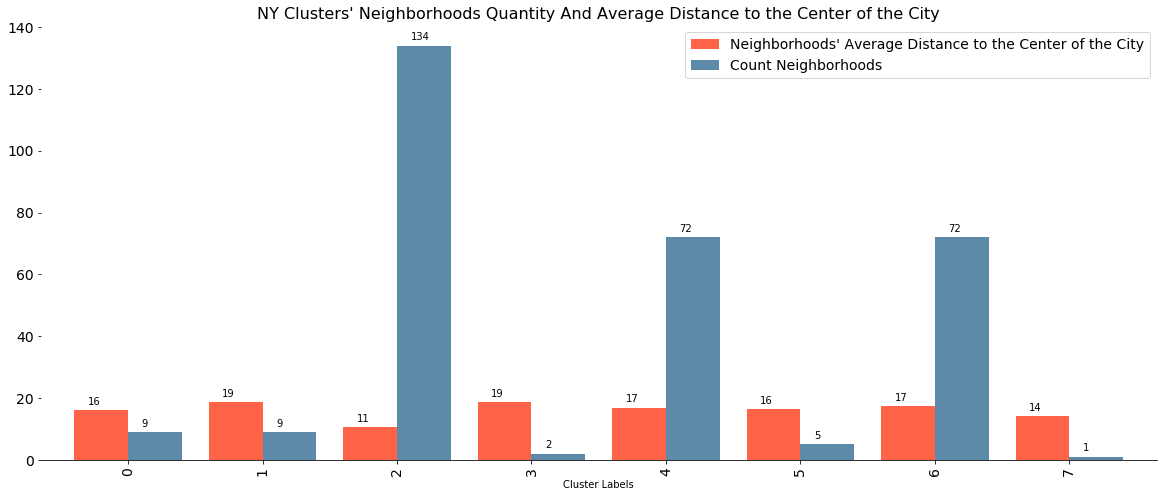

In [77]:
#PLOT1
ax1 = ny_cl.plot(kind = 'bar',
                figsize = (20,8),
                width = 0.8,
                color = ('#ff6347','#5d8aa8'),
                fontsize = 14)

ax1.set_xlabel('Cluster Labels')

ax1.set_title("NY Clusters' Neighborhoods Quantity And Average Distance to the Center of the City", 
             fontsize = 16)
ax1.legend(fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Adding values    
for p in ax1.patches:
    ax1.annotate('{:,.0f}'.format(p.get_height()),
                xy=(p.get_x()+0.1, p.get_height()+1.8))


Toronto

In [71]:
t_cl_num=pd.DataFrame(t_dist.groupby(['Cluster Labels']).count())
t_cl_num

,Neighborhood,dist_km_t
Cluster Labels,,
0,27,27
1,162,162
2,3,3
3,10,10
4,5,5


In [72]:
t_cl_dist=pd.merge(t_cl_dist,
                t_cl_num[['Neighborhood']],
                left_on='Cluster Labels',
                right_on='Cluster Labels',
                how='left')

In [73]:
t_cl=t_cl_dist.rename(columns={"Neighborhood": "Count Neighborhoods", "dist_km_t": "Neighborhoods' Average Distance to the Center of the City"})
t_cl

,Neighborhoods' Average Distance to the Center of the City,Count Neighborhoods
Cluster Labels,,
0,10.748973,27
1,9.029839,162
2,23.296922,3
3,10.149764,10
4,13.481625,5


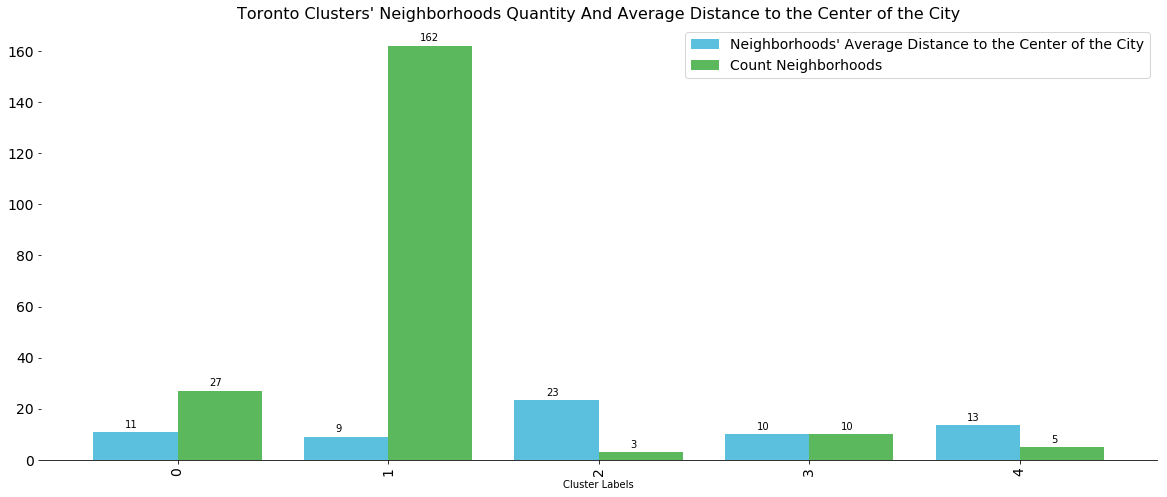

In [78]:
#PLOT_Toronto
ax1 = t_cl.plot(kind = 'bar',
                figsize = (20,8),
                width = 0.8,
                color = ('#5bc0de','#5cb85c'),
                fontsize = 14)

ax1.set_xlabel('Cluster Labels')

ax1.set_title("Toronto Clusters' Neighborhoods Quantity And Average Distance to the Center of the City", 
             fontsize = 16)
ax1.legend(fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)

# Adding values    
for p in ax1.patches:
    ax1.annotate('{:,.0f}'.format(p.get_height()),
                xy=(p.get_x()+0.15, p.get_height()+1.8))


Next I prepared a code to map every cluster of NY separately.

In [93]:
i=4
ny_cluster=ny_data_8.loc[ny_data_8['Cluster Labels'] == i, ny_data_8.columns[[1] + list(range(13, 15))]]
ny_cluster.head()

,Neighborhood,Latitude,Longitude
14,Baychester,40.866858,-73.835798
17,Bedford Park,40.870185,-73.885512
19,Beechhurst,40.792781,-73.804365
20,Bellaire,40.733014,-73.738892
25,Bergen Beach,40.615150,-73.898556


In [94]:
# create map of NY using latitude and longitude values
map_ny = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=11)

# add markers to map
for lat, lng, label in zip(ny_cluster['Latitude'], ny_cluster['Longitude'], ny_cluster['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny

Next I prepared a code to map every cluster of Toronto separately.

In [88]:
i=1
t_cluster=toronto_data.loc[toronto_data['Cluster Labels'] == i, toronto_data.columns[[1] + list(range(14, 16))]]
t_cluster.head()

,Neighborhood,Latitude,Longitude
0,Adelaide,43.650571,-79.384568
1,Agincourt,43.794200,-79.262029
3,Albion Gardens,43.739416,-79.588437
4,Alderwood,43.602414,-79.543484
5,Bathurst Manor,43.754328,-79.442259


In [81]:
list(toronto_data)

['Cluster Labels',
 'Neighborhood',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue',
 'Postcode',
 'Borough',
 'Latitude',
 'Longitude',
 'dist_km_t']

In [82]:
mapping_clusters_t=toronto_data.copy()


In [83]:
mapping_clusters_t.drop(columns=['Borough','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue','dist_km_t','Postcode'],inplace=True)

In [84]:
mapping_clusters_t.head()

,Cluster Labels,Neighborhood,Latitude,Longitude
0,1,Adelaide,43.650571,-79.384568
1,1,Agincourt,43.794200,-79.262029
2,0,Agincourt North,43.815252,-79.284577
3,1,Albion Gardens,43.739416,-79.588437
4,1,Alderwood,43.602414,-79.543484


In [89]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

# add markers to map
for lat, lng, label in zip(t_cluster['Latitude'], t_cluster['Longitude'], t_cluster['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff6347',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Mapping all the clusters of NY

In [90]:
kclusters = 8

# create map
map_clusters = folium.Map(location=[latitude_ny, longitude_ny], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mapping_clusters['Latitude'], mapping_clusters['Longitude'], mapping_clusters['Neighborhood'], mapping_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Mapping all the clusters of Toronto

In [91]:
kclusters_t = 5

# create map
map_toronto_clusters = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters_t)
ys = [i + x + (i*x)**2 for i in range(kclusters_t)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mapping_clusters_t['Latitude'], mapping_clusters_t['Longitude'], mapping_clusters_t['Neighborhood'], mapping_clusters_t['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto_clusters)
       
map_toronto_clusters

## Discussion 

Of the 8 clusters in New York, the most numerous were 3 with the number of neighborhoods 134, 72 and 72, respectively.

1.  In the first cluster of NY we see a lot of restaurants, several supermarkets, banks. I suppose it could be a good place to relax. It is situated near the see or park zones. Good place for tourists and entertainment of any kind. The average neighborhoods distance to the center of the city is the shortest among all the clusters – 11 kilometers.
2.	In the second cluster of NY we see a lot of pizza places, several banks, pharmacies, grocery stores. It consumes neighborhoods areas partly situated near the beach zones. I suppose this cluster composes usual places for living middle-class people. The average neighborhoods distance to the center of the city is 17 kilometers.
3.	The third cluster at first glance is something alike to the first one, but instead of parks - two baseball fields and the average neighborhoods distance to the center of the city is 17 kilometers.


Of the 5 clusters in Toronto, the most numerous were 3 with the number of neighborhoods 162, 27 and 10, respectively.

1. The first cluster of Toronto looks like a place near the airport, as there are Airport Lounges & Airport Services, respectively, a lot of coffee houses. There are also 11 Skating Rink and a lot of places to have a snack. The average neighborhoods distance to the center of the city is the shortest among all the clusters - 9 kilometers.

2. The second cluster in Toronto has 7 parks and not very much places to have a snack. It is some kind of a park's place, a place for relax. The average neighborhoods distance to the center of the city is 11 kilometers.

3. The third cluster in Toronto has 10 baseball fields and several shops. The average neighborhoods distance to the center of the city is 10 kilometers.


## Result 

I would recommend opening a restaurant in the first cluster of New York. Yes, there will be high competition, but this place clearly attracts a large number of people. Regarding Toronto, there are clearly fewer restaurants, but this is most likely due to less demand for such places. If the owner is still inclined to choose Toronto for starting a business, I would recommend additional research focused on Toronto.